EP_02. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
-----
## 학습 전제
---
- numpy, pandas, matplotlib 등의 라이브러리를 자유롭게 활용할 수 있다.
- 원핫인코딩 등의 간단한 데이터 전처리 방식의 개념에 대해 알고있다.
- 고등 수학 과정 중 도함수의 정의와 미분계수 수식, 그리고 간단한 미분 공식을 알고 있다.
- 머신러닝의 개념과 그 패러다임에 관해 학습해본 적이 있으며, 낯설지 않다.
## 학습 목표
---
- 입력데이터인 X, 정답데이터인 y, 모델의 출력인 prediction 각각의 개념을 알고, y에 가까운 prediction을 낼 수 있도록 학습한다는 철학을 이해한다.
- 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류와 구현을 익힌다.
- 손실함수를 미분해서 구하는 기울기는 손실함수값을 줄이기 위해 필요한 것임을 이해하고, 그 구현을 수치미분과 해석미분 두 가지 방법으로 진행해본다.
- 손실함수를 정의하고 경사하강법을 활용해 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 선형 회귀 프로젝트의 전체 프로세스를 경험하고 익힌다.
- sklearn의 LinearRegression을 활용해 빠르고 간편하게 선형 회귀 하는 방법을 익힌다.


Step
1. 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기
* (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기
* (2) 모델을 세운다는 것, 그에 대한 의미 이해하기
* (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기
* (4) 모델을 점점 똑똑하게 만드는 방법? 손실 함수를 줄이면 되겠지!
* (5) 한번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!
2. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해보기
* (1) 손님의 성별,수,전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?
* (2) 다시 한번 직접 설계해 보는 손실함수
* (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기
* (4) 모두 준비되었다면, 모델 학습은 간단하죠!(사실 상 위의 내용을 전부 이해해야함)
* (5) 지금까지 한 모든 과정을, 라이브러리로 깔끔하게

### 1. 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기

#### (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기

실습에 필요한 모듈을 불러옵니다.(Image, pandas, numpy)  
pandas로 데이터를 불러온 뒤 데이터를 확인합니다.

In [1]:
from IPython.display import display, Image
import pandas as pd
import numpy as np

macbook = pd.read_csv('/home/aiffel/Code/Exploration Practice/2/data/macbook.csv')
print(macbook.shape)
print(macbook.head())

(80, 2)
   used_years  price
0        2.65    175
1        3.80     63
2        0.95    273
3        4.50    133
4        4.45    106


데이터를 시각화하여 그래프를 만듭니다.  
그래프를 그리기 위해 matplotlib 라이브러리를 사용합니다.  
x축을 used_years, y축을 price로 하는 2차원 그래프를 만듭니다.
scatter 함수를 통해서 점을 흩뿌리게 됩니다.

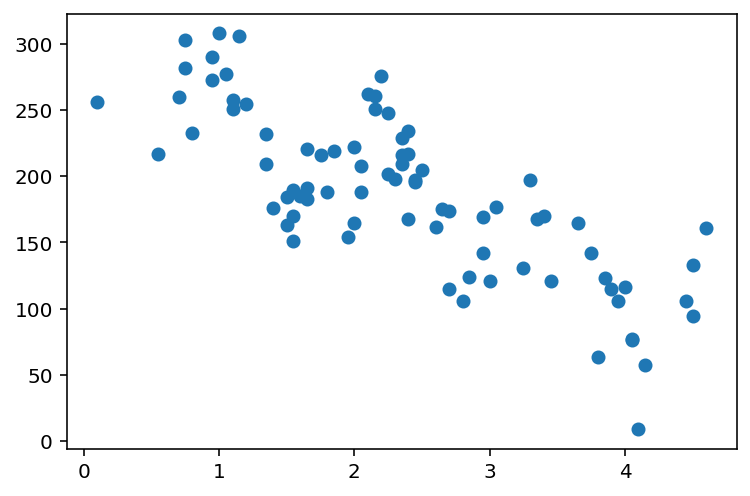

In [2]:
import matplotlib.pyplot as plt
# 실행한 브라우저(인터넷 클라우드 환경)에서 바로 그림을 볼 수 있게 해주는 코드 = %matplotlib inline / local은 그냥 되는 듯 하다 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

형태를 보니 x와 y는 음의 상관관계를 가집니다.
그럼 상관계수 값을 확인해 봅시다.  
상관계수는 numpy의 corrcoef() 함수를 사용합니다.  
2x2 행렬의 중심을 가는 대각선 위치인 (0,0), (1,1)은 각각 1번 변수와 1번 변수의 관계, 2번 변수와 2번 변수의 관계라서 1이 되고  
(차원이 증가되고 같을 듯)  
(0,1), (1,0)은 1번 변수와 2번 변수이고 값이 음수이므로 음의 상관관계를 가진다고 볼 수 있습니다.

In [3]:
# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

#### (2) "모델"을 만든다는 것, 그 의미 이해하기

모델이란 무엇일까요?
* 모델 : 특정 정보를 입력받아서 그 정보에 따라 원하는 값을 예측하여 값을 출력하는 함수
* 함수 : 입력값을 받아 특정 연산을 행한 값을 출력하는 것
* 모델 : 특정 정보를 입력받아서 그 정보에 따라 특정 연산을 행한 값을 출력
* 모델은 함수이기에 x,y를 준비한다.
* 이제 used_years 를 입력하여 price 를 예측하는 모델을 만들어 봅시다.  
  
x, y 값에 해당하는 used_year, price를 각각 변수에 넣어줍니다.

In [4]:
x = macbook["used_years"].values
y = macbook["price"].values

먼저 일차함수 모델을 만들어보겠습니다.(y = ax + b)

In [5]:
def model(x, w, b):
    y = w * x + b
    return y

print(model(5,2,1))
print(model(x = 5, w = 2, b = 1))

11
11


모델 학습이란 무엇일까요?
학습 또는 훈련(training)은 모델이 입력을 받았을 때 정답 값에 가까운 출력을 낼 수 있는 최적의 매개변수(parameter)를 찾는겁입니다.  
방정식을 푸는 것과 똑같습니다.
위에 구한 함수와 3가지 데이터 (2, 100), (5, 40), (6, 20)를 가지고 그래프를 그려봅시다.  
(이미 위 3점으로 w = -20, b = 140을 구한 상태입니다)

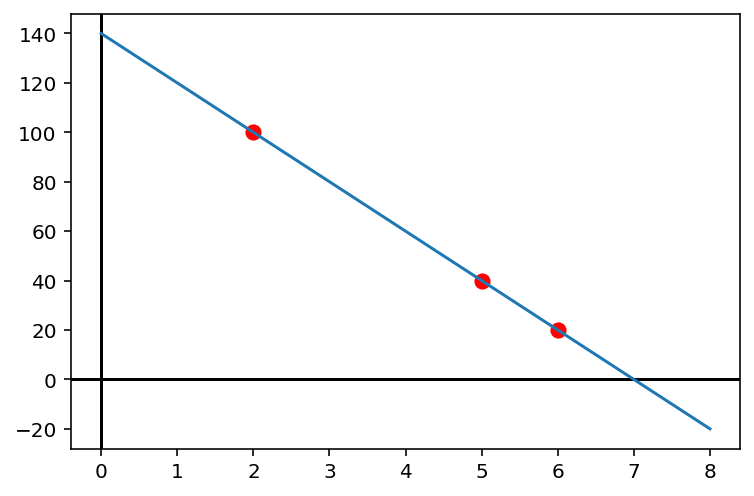

In [6]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

하지만 실제 데이터트 이렇게 일직선으로 나오지 않습니다. macbook data를 그래프로 표현해볼까요?

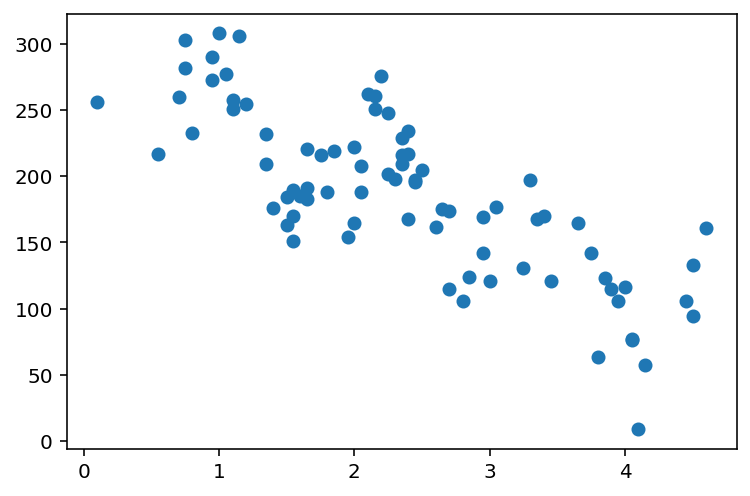

In [7]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

위와 같이 데이터가 산점도로 표현되어 있으면 해당 데이터를 나타내는 1차원 방정식(직선)을 딱 정립하기 어렵습니다.  
여기서 그래도 최대한 해당 데이터를 표현하는 1차원 방정식을 찾기위해 적절한 기울기와 y절편(매개변수 값(위의 w,b))을 찾아야합니다.

#### (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기

일단 불완전한 모델을 만들기 위해 아무 w,b 값을 넣어보고 그래프를 그려봅시다.

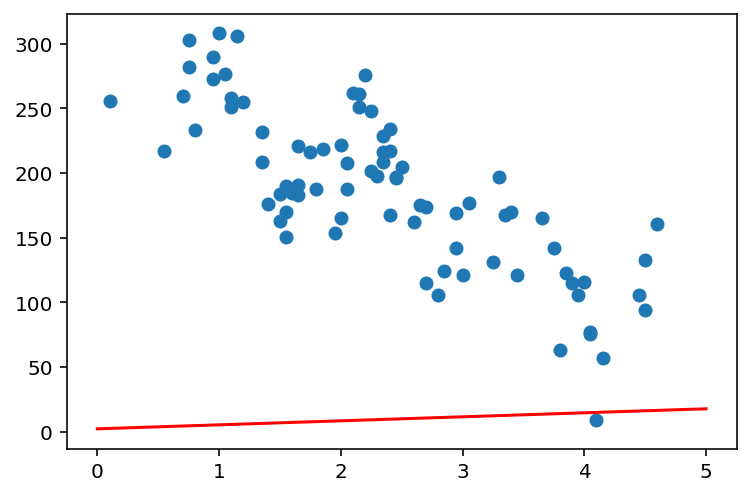

In [8]:
w = 3.1
b = 2.3

x = np.linspace(0, 5, 6) # x축을 0~5까지 6개의 샘플로 표현
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()


그래프와 데이터가 전혀 맞지 않습니다.  
used_year을 한번 가져와서 봅시다.

In [9]:
x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

모델이 출력하는 값을 prediction에 담아봅시다.  
그리고 해당 값을 DataFrame에 넣어서 실제 값과 얼마나 다른지 확인해봅시다.  
price 값과 prediction 값의 차이가 엄청나군요

In [10]:
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
print(prediction)

macbook['prediction'] = prediction
macbook.head()

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


price 와 prediction 의 차이는 지금 모델이 얼마나 잘못 계산하고 있는지를 나타냅니다.  
해당 값(Error)을 나타내는 열을 DataFrame에 추가해 봅시다.

In [11]:
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


에러를 나타내는 지표
* MAE : 오차의 절대값의 평균
* MSE : 오차의 제곱의 평균
* RMSE : MSE의 제곱근
* R<sup>2</sup> : 1 - ( (해당값 - 예측값)의 제곱의 합계 / (해당값 - 평균)의 제곱의 합계 )

여기서 우리는 RMSE을 구하는 함수를 만들어봅시다.
다시 한번 prediction을 구한 뒤,  
prediction 값과 실제 값을 넣어서 RMSE를 구해봅니다.

In [12]:
import math
#a,b = 실제값, 예측값
def MSE(a,b):
    value = ((a-b)**2).mean()
    return value

def RMSE(a,b):
    return math.sqrt(MSE(a,b))

x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x,w,b)
print(predictions)

rmse = RMSE(y, predictions)
print("RMSE =", rmse)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]
RMSE = 188.81322969819274


이렇게 예측값과 정답값에 대한 차이를 계산하는 함수를 손실함수(loss function), 비용함수(cost function)이라 부릅니다.  
손실(loss)이 크면 예측이 잘 안되는 것이고 손실이 작으면 예측을 잘한다고 볼 수 있습니다.  
따라서 우리는 RMSE를 가지고 loss함수를 구현해보겠습니다.  
* 손실함수 : 모델이 예측하는 출력값과 정답값 간의 거리를 나타내는 함수

In [13]:
def loss(x,w,b,y):
    predictions = model(x,w,b)
    L = RMSE(y, predictions)
    return L

loss(x,w,b,y)

188.81322969819274

#### (4) 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지!

최적의 w값을 찾아가는 방향을 알아내기 위해 기울기(gradient)를 구해야한다.  
w에서 기울기를 구하고 양이면 값을 줄이고 음이면 값을 높여서 0에 맞추게 가야한다.  
이러한 기울기의 변화로 매개변수 값을 구하는 것을 경사하강법이라고 합니다.

* 미분 : 기울기를 계산함.
* 수치미분 : 매우 작은 값에 대한 변화를 계산함(0에 근접하는 값)

loss function의 기울기를 계산하는 함수를 만들어봅시다.  
= loss function의 미분 값을 구하는 함수를 만들어봅시다.

In [14]:
def gradient_old(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

# 좀더 명확한 값을 위해 중심 차분(중앙 차분) 구하기
h = math.exp(-4)

def gradient(x, w, b, y):
    dw = (loss(x, w + h, b, y) - loss(x, w - h, b, y)) / (2 * h)
    db = (loss(x, w, b + h, y) - loss(x, w, b - h, y)) / (2 * h)
    return dw, db

#### (5) 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!

이제 기울기와 손실함수를 구했으니 최적의 모델을 위한 w와 b를 찾아봅시다.  
일단 경사하강법에 필요한 학습률 상수를 정의하고 시작하겠습니다.

In [15]:
LEARNING_RATE = 1

##### 모델 최적화
x, y 데이터를 준비하고 초기 가중치를 랜덤으로 잡은 뒤 손실함수 값을 저장할 리스트 losses[]  
학습은 이제 이 행동을 반복합니다.

In [16]:
x = macbook["used_years"].values
y = macbook["price"].values

w = 3.1
b = 2.3
print(w,b)
losses = []

for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

3.1 2.3
Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8561
Iteration 400 : Loss 70.1800
Iteration 500 : Loss 59.9779
Iteration 600 : Loss 51.7476
Iteration 700 : Loss 45.8357
Iteration 800 : Loss 42.1475
Iteration 900 : Loss 40.1358
Iteration 1000 : Loss 39.1421
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


얻은 losses 배열을 그래프로 출력해보고 마지막 w,b 값을 출력해봅시다.

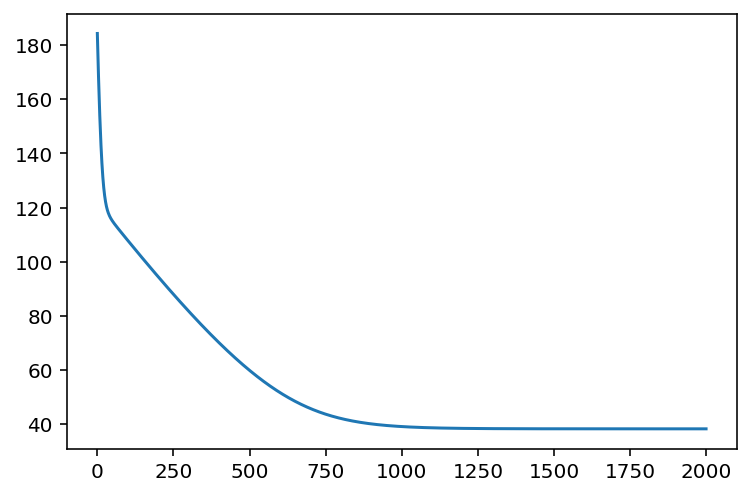

-44.92737553468688 293.08118989130287


In [17]:
plt.plot(losses)
plt.show()
print(w,b)

이제 변화된 w와 b를 가지고 학습이 완료된 모델, 일차함수를 함께 그려보겠습니다.

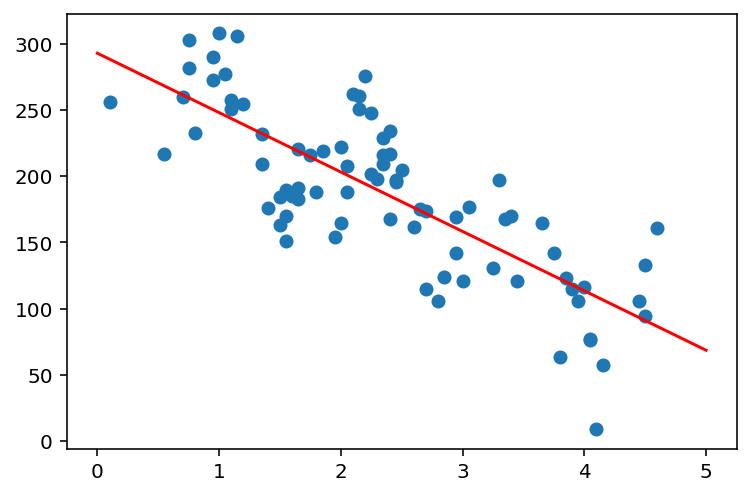

In [18]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")

# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

이제 제대로 예측할 수 있는지 확인하기 위해 새로운 데이터를 가져와보겠습니다.  
가져온 data를 새로운 test data에 넣습니다.  
새롭게 예측한 값을 DataFrame에 넣습니다.

In [19]:
test = pd.read_csv("/home/aiffel/Code/Exploration Practice/2/data/macbook_test.csv")
print(test.shape)
print(test.head())

test_x = test['used_years'].values
test_y = test['price'].values

prediction = model(test_x, w, b)
test['prediction'] = prediction
test

(20, 2)
   used_years  price
0        1.20    203
1        1.85    206
2        2.40    191
3        2.85    164
4        3.05    176


,used_years,price,prediction
0,1.20,203,239.168339
1,1.85,206,209.965545
2,2.40,191,185.255489
3,2.85,164,165.038170
4,3.05,176,156.052695
5,3.35,136,142.574482
6,2.55,133,178.516382
7,2.60,181,176.270014
8,2.50,181,180.762751
9,3.10,86,153.806326


이제 Error를 직접 구해보고 RMSE도 구해보고  
모델 일차함수와 실제값, 예측값을 나타내는 그래프를 그려보겠습니다.

    used_years  price  prediction       error
0         1.20    203  239.168339  -36.168339
1         1.85    206  209.965545   -3.965545
2         2.40    191  185.255489    5.744511
3         2.85    164  165.038170   -1.038170
4         3.05    176  156.052695   19.947305
5         3.35    136  142.574482   -6.574482
6         2.55    133  178.516382  -45.516382
7         2.60    181  176.270014    4.729986
8         2.50    181  180.762751    0.237249
9         3.10     86  153.806326  -67.806326
10        2.70    171  171.777276   -0.777276
11        3.40    253  140.328113  112.671887
12        1.30    263  234.675602   28.324398
13        1.80    129  212.211914  -83.211914
14        3.10    135  153.806326  -18.806326
15        1.55    236  223.443758   12.556242
16        1.80    206  212.211914   -6.211914
17        3.55    203  133.589007   69.410993
18        3.40     96  140.328113  -44.328113
19        2.50    115  180.762751  -65.762751
RMSE = 45.03916222164869


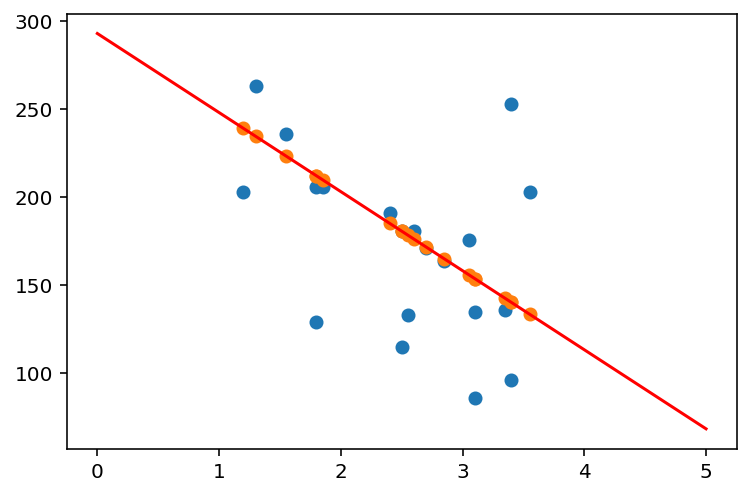

In [20]:
test['error'] = test['price'] - test['prediction']
print(test)

rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
print('RMSE =', rmse)

# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")
#y를 빨갛게 선긋기

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

### 2. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기

#### (1) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?

seaborn을 이용해 시각화를 더 예쁘게 해봅시다.  
seaborn에서 가져올 수 있는 dataset의 이름들입니다.

In [21]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

많은 데이터들 중에서 tip을 가져와 봅시다.

In [22]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


244행과 7열으로 이루어져있습니다.  
우리는 수식을 사용하기 때문에 문자열 데이터를 실수로 바꿔줘야 합니다.  
이때 pandas의 get_dummies() 함수를 활용해 0,1로 반환해줍시다.  
이는 카테고리형 데이터를 수식에 포함시켜줄 수 있는 방법입니다.

In [23]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


sex는 sex_Male, sex_Female로 smoker는 smoker_Yes와 smoker_No로 day는 4개의 요일로, time도 2개로 나눠졌습니다.  
이렇게 데이터를 변환하는 방식을 원-핫 인코딩(One Hot Encoding)이라고 합니다.  
이제 columns의 순서를 목적에 맞게 바꿔봅시다.(tips를 맨뒤로)

In [24]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


y = w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> + ... + w<sub>11</sub>x<sub>11</sub> + w<sub>12</sub>x<sub>12</sub> + b 식으로 표현된다.  
다만 표기법에 따라 b를 w<sub>0</sub>로 표기하고 x를 대신 x<sub>0</sub> = 1 로 나타내기도 한다.  
y = w<sub>0</sub> * 1 + w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> + ... + w<sub>11</sub>x<sub>11</sub> + w<sub>12</sub>x<sub>12</sub>

#### (2) 다시 한 번 직접 설계해 보는 손실함수

x,y를 12개의 값을 가지는 벡터로 해서 대문자 X로 쓰고, y 값은 value값을 가져옵시다.  

In [25]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

test와 train을 나누기 위해 sklearn의 train_test_split 함수를 가져옵니다.  
20%를 test로 random_state를 42로 합니다.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


길이가 12개인 W와 1개인 b를 초기 랜덤값으로 해서 구합니다.

In [27]:
W = np.random.rand(12)
b = np.random.rand()
print(W,b,sep = "\n")

[0.2859326  0.09328416 0.3769203  0.93384105 0.99226366 0.49810097
 0.59481068 0.16206125 0.83660043 0.45028215 0.87476945 0.87119721]
0.1092530775186169


In [28]:
def model2(X, W, b):
    predictions = 0
    for i in range(12): # W가 12개 이므로 12번 반복
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

이번에는 MSE를 사용해봅시다.

In [29]:
def loss2(X, W, b, y):
    predictions = model2(X, W, b)
    L = MSE(predictions, y)
    return L

#### (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기

자 기울기값을 구하기 위한 식을 생각해 봅시다.  
먼저 손실 함수인 Loss를 봅시다. MSE를 사용합니다.  
Loss = MSE = (1/N) * sigma(N,i=1){ (y_true - y_pred) ** 2}  
= dL/dw<sub>i</sub> = d{((1/N) * sigma(N,i=1){ (y_true - y_pred) ** 2})}/dw<sub>i</sub>  
= (1/N) * (sigma(N,i=1) d{{ (y_true - y_pred) ** 2})}  
해당식을 쉽게 이해하기 위해서 (x-a)<sup>2</sup>를 먼저 미분합니다.
(x-a)<sup>2</sup>를 x에 대해 미분하게 되면 2(x - a)가 되는데 이는  
2 * (x - a) * d(x-a)/dx 입니다. 그리고 뒷 부분의 d(x-a)/dx는 1이 되므로 2(x-a)가 됩니다.  
이를 위에 대입해보면 (y_pred가 변수를 가집니다, y_true가 상수이고요)
= (1/N) * (sigma(N,i=1) 2 * (y_pred - y_true) * d(y_pred - y_true) / d(w<sub>i</sub>) 입니다.  
여기서 y_pred 는 w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> + ... + w<sub>11</sub>x<sub>11</sub> + w<sub>12</sub>x<sub>12</sub> + b 이므로 그냥 각각의 w<sub>i</sub> 에 대해 미분하게 되면 x<sub>i</sub>이 나옵니다.  
그럼 식은  
= (1/N) * (sigma(N,i=1) 2 * (y_pred - y_true) * x<sub>i</sub> 이 나오고  
각 i 별로 보면 2/N * (y_pred - y_true) * x<sub>i</sub> 입니다.
그럼 위식에 맞게 W 벡터에 값을 곱해줍니다.

편미분을 활용하기 위한 함수를 만듭니다.

In [30]:
print(X.shape, y.shape)

def gradient2(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model2(X, W, b)
    
    # 공식에 맞게 gradient 계산 = 2 * xi * (y_pred - y) * 1/N
    # X = (num,12), y = (num,) 이므로 행렬 곱 X*y는 안되고 우리가 원하는건 12, 이므로 X를 전치해서 X.T = (12,num) 한뒤 y를 곱한다
    # X.T = (12, num), y = (num,) -> (12, num) * (num,) = (12,)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient2(X, W, b, y)
print("dW:", dW)
print("db:", db)

(244, 12) (244,)
dW: [5218.35491245  634.13914233  150.11746381   83.49525767   97.70743414
  135.90528734   55.69721986   15.95565659   89.84844172   72.11140331
   59.71619434  173.89652715]
db: 11.489150236887994


#### (4) 모두 준비 되었다면, 모델 학습은 간단하다구!

앞에 해본대로 모델 학습을 해봅시다.

In [31]:
LEARNING_RATE2 = 0.0001

losses2 = []

for i in range(1, 1001):
    dW, db = gradient2(X_train, W, b, y_train)
    W -= LEARNING_RATE2 * dW
    b -= LEARNING_RATE2 * db
    L = loss2(X_train, W, b, y_train)
    losses2.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 1.9920
Iteration 20 : Loss 1.9701
Iteration 30 : Loss 1.9505
Iteration 40 : Loss 1.9315
Iteration 50 : Loss 1.9131
Iteration 60 : Loss 1.8954
Iteration 70 : Loss 1.8782
Iteration 80 : Loss 1.8616
Iteration 90 : Loss 1.8455
Iteration 100 : Loss 1.8300
Iteration 110 : Loss 1.8149
Iteration 120 : Loss 1.8002
Iteration 130 : Loss 1.7860
Iteration 140 : Loss 1.7722
Iteration 150 : Loss 1.7589
Iteration 160 : Loss 1.7459
Iteration 170 : Loss 1.7333
Iteration 180 : Loss 1.7210
Iteration 190 : Loss 1.7091
Iteration 200 : Loss 1.6976
Iteration 210 : Loss 1.6863
Iteration 220 : Loss 1.6753
Iteration 230 : Loss 1.6647
Iteration 240 : Loss 1.6543
Iteration 250 : Loss 1.6442
Iteration 260 : Loss 1.6343
Iteration 270 : Loss 1.6248
Iteration 280 : Loss 1.6154
Iteration 290 : Loss 1.6063
Iteration 300 : Loss 1.5974
Iteration 310 : Loss 1.5887
Iteration 320 : Loss 1.5803
Iteration 330 : Loss 1.5720
Iteration 340 : Loss 1.5640
Iteration 350 : Loss 1.5561
Iteration 360 : Loss 1.5484
I

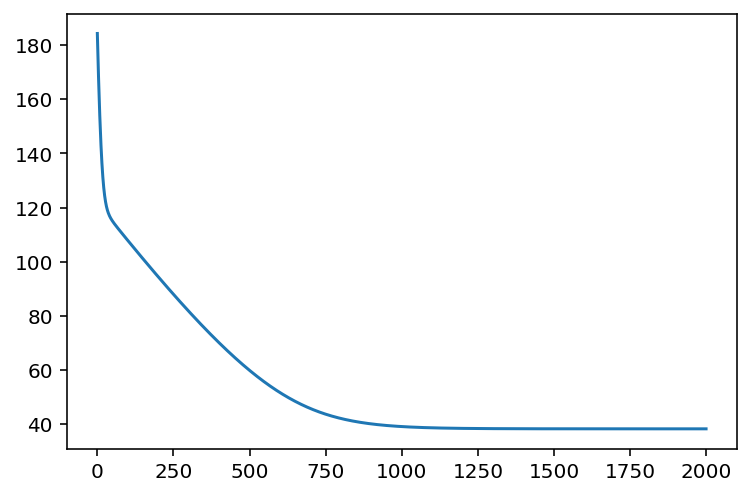

In [32]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [33]:
print(W,b)

[ 0.07941008 -0.06971489  0.28154724  0.40807672  0.45720657  0.41202068
  0.35747102  0.12463924  0.41538582  0.52512103  0.60266838  0.5221609 ] 0.07102923819050112


In [34]:
prediction = model2(X_test, W, b)
mse = loss2(X_test, W, b, y_test)
mse

0.6962559123324278

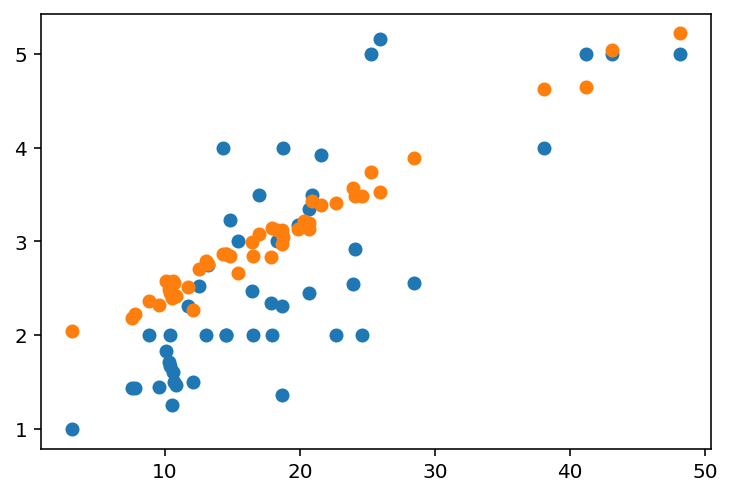

In [35]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

#### (5) 지금까지 한 모든 과정을, 라이브러리로 깔끔하게

이제 sklearn 라이브러리를 통해 간편하게 구해봅시다.  
먼저 데이터를 준비합니다.

In [36]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

* X,y도 준비합니다.(X3, y3)
* train, test도 나눕니다.
* sklearn.linear_model 안에 LinearRegression을 사용합니다.
    - fit
    - predict test
    - 출력

In [37]:
X3 = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y3 = tips['tip'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

predictions3 = model3.predict(X3_test)
print(predictions3)

[2.91436632 2.00292613 3.96425583 3.76380832 2.14836306 2.67423448
 3.63934628 2.29147245 2.57207155 2.45851225 2.90446763 2.0573337
 2.11817193 2.35130838 1.82976215 3.10830675 2.95140176 3.21602976
 2.56640892 5.73957295 3.43490366 3.22645102 2.17139823 1.94180002
 3.16394533 2.24547894 2.14497574 3.21025435 3.20097595 6.66803147
 5.01111235 1.57804024 3.1909877  2.76652194 2.98412862 3.85695724
 2.17008741 5.46673999 2.35586827 2.99190732 2.03271177 2.48465991
 3.44046814 2.35532237 1.92528104 0.87348926 1.81911521 3.04083954
 1.85436902]


성능 평가를 해봅시다. 성능 방법은 MSE를 사용할건데 이는 sklearn.metrics의 mean_squared_error에 들어있습니다.  
MSE를 구한뒤 시각화를 합니다.

0.7033566017436105
<class 'numpy.ndarray'>
<class 'tuple'>


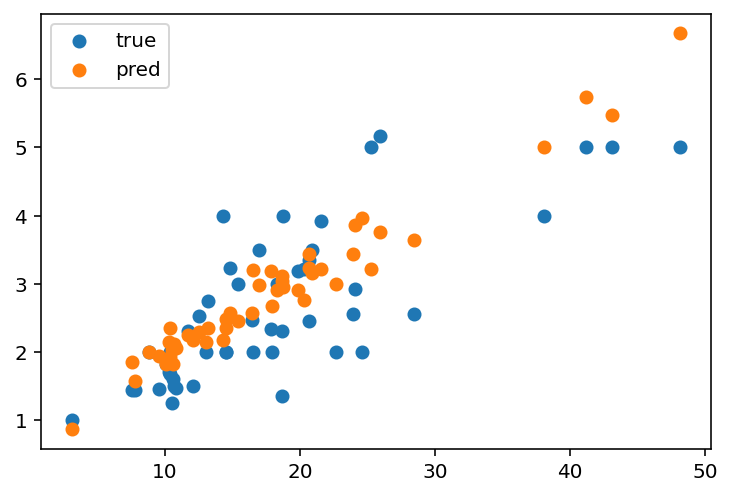

In [42]:
from sklearn.metrics import mean_squared_error

mse3 = mean_squared_error(y3_test, predictions3)
print(mse3)

print(type(X3_test))
print(type(y3_test.shape))
plt.scatter(X3_test[:, 0], y3_test, label="true")
plt.scatter(X3_test[:, 0], predictions3, label="pred")
plt.legend()
plt.show()